# Data preparation Task

Import necessary packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

Load csv files

In [3]:
cologneData = pd.read_csv("../../Data Sets/koeln.csv")

essenData = pd.read_csv("../../Data sets/essen.csv")

In [4]:
cologneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977460 entries, 0 to 977459
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            977460 non-null  object 
 1   time           977460 non-null  object 
 2   b_number       977460 non-null  int64  
 3   city           977460 non-null  object 
 4   trip_duration  977460 non-null  object 
 5   orig_lat       977460 non-null  float64
 6   orig_lng       977460 non-null  float64
 7   dest_lat       977460 non-null  float64
 8   dest_lng       977460 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 67.1+ MB


In [5]:
essenData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54411 entries, 0 to 54410
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            54411 non-null  object 
 1   time           54411 non-null  object 
 2   b_number       54411 non-null  int64  
 3   city           54411 non-null  object 
 4   trip_duration  54411 non-null  object 
 5   orig_lat       54411 non-null  float64
 6   orig_lng       54411 non-null  float64
 7   dest_lat       54411 non-null  float64
 8   dest_lng       54411 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ MB


## Get Weekdays from day Object

In [6]:
essenData.head(10)

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng
0,2019-06-29,15:13:00,683,essen,0 days 00:35:00.000000000,51.361387,6.937236,51.386582,6.998130
1,2019-01-20,10:13:00,693,essen,0 days 00:07:00.000000000,51.461765,7.007779,51.452158,7.014620
2,2019-01-22,07:50:00,693,essen,0 days 00:08:00.000000000,51.452158,7.014620,51.463641,7.009654
3,2019-01-23,10:08:00,693,essen,0 days 00:47:00.000000000,51.463641,7.009654,51.458406,7.011209
4,2019-01-23,11:25:00,693,essen,0 days 00:29:00.000000000,51.458406,7.011209,51.463641,7.009654
5,2019-01-24,12:40:00,693,essen,0 days 00:11:00.000000000,51.463641,7.009654,51.474597,7.007743
6,2019-01-25,04:54:00,693,essen,0 days 01:01:00.000000000,51.474597,7.007743,51.461934,7.011858
7,2019-01-29,13:54:00,693,essen,0 days 00:43:00.000000000,51.461934,7.011858,51.461765,7.007779
8,2019-02-04,11:01:00,693,essen,0 days 00:11:00.000000000,51.463641,7.009654,51.458406,7.011209
9,2019-02-04,12:34:00,693,essen,0 days 00:20:00.000000000,51.458406,7.011209,51.463641,7.009654


In [7]:
## mfunke4

# transform value to day string
def getDayFromWeekdayNumber(argument):
    switcher = {
        0: "Monday",
        1: "Tuesday",
        2: "Wednesday",
        3: "Thursday",
        4: "Friday",
        5: "Saturday",
        6: "Sunday",
    }
    return switcher.get(argument)

In [8]:
## mfunke4
 
# iterate through dataframe and assign correct weekday to date
for i in essenData.index:
    weekdayNumber = datetime.strptime(essenData.day[i], '%Y-%m-%d').weekday()
    essenData.at[i, "weekday"] = getDayFromWeekdayNumber(weekdayNumber) 
    
# old method

#for i in essenData.index:
#   weekdayNumber = datetime.strptime(essenData.day[i], '%Y-%m-%d').weekday()
#   essenData.loc[i, "weekday"] = getDayFromWeekdayNumber(weekdayNumber)    

# display head
essenData.head()

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,weekday
0,2019-06-29,15:13:00,683,essen,0 days 00:35:00.000000000,51.361387,6.937236,51.386582,6.998130,Saturday
1,2019-01-20,10:13:00,693,essen,0 days 00:07:00.000000000,51.461765,7.007779,51.452158,7.014620,Sunday
2,2019-01-22,07:50:00,693,essen,0 days 00:08:00.000000000,51.452158,7.014620,51.463641,7.009654,Tuesday
3,2019-01-23,10:08:00,693,essen,0 days 00:47:00.000000000,51.463641,7.009654,51.458406,7.011209,Wednesday
4,2019-01-23,11:25:00,693,essen,0 days 00:29:00.000000000,51.458406,7.011209,51.463641,7.009654,Wednesday


In [9]:
## mfunke4
## takes some time ##

# iterate through dataframe and assign correct weekday to date
for i in cologneData.index:
    weekdayNumber = datetime.strptime(cologneData.day[i], '%Y-%m-%d').weekday()
    cologneData.at[i, "weekday"] = getDayFromWeekdayNumber(weekdayNumber) 
    
# display head
cologneData.head()

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,weekday
0,2019-01-23,12:49:00,20137,koeln,0 days 02:48:00.000000000,51.323978,12.337974,50.920134,6.971512,Wednesday
1,2019-01-23,12:49:00,20199,koeln,0 days 02:03:00.000000000,51.323978,12.337974,50.920134,6.971512,Wednesday
2,2019-03-09,00:36:00,21000,koeln,0 days 00:12:00.000000000,50.958923,7.008967,50.940311,7.018941,Saturday
3,2019-09-15,10:28:00,21001,koeln,0 days 00:26:00.000000000,50.944960,6.972005,50.949760,6.981434,Sunday
4,2019-09-15,16:10:00,21001,koeln,0 days 00:47:00.000000000,50.949800,6.981403,50.934821,7.001967,Sunday


## Weather data

### Air Pressure

In [10]:
#mfunke4

#import Data
airPressure = pd.read_csv("../weather_data/3_weather_data/air_pressure/data_air_pressure_hpa_hourly.csv")

# change timestamp format
for i in airPressure.index:
    
    airPressure.at[i, "Zeitstempel"] = datetime.strptime(str(airPressure.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    airPressure.at[i, "day"] = airPressure.at[i, "Zeitstempel"].date()
    airPressure.at[i, "time"] = airPressure.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
airPressure = airPressure.drop(columns=["Zeitstempel"])

# rearrange column order
cols = airPressure.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

airPressure = airPressure[cols] 

# show Dataframe
#airPressure.info()
airPressure.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,P0_MN008,1303,1013.5,0,3
1,2019-01-01,01:00:00,P0_MN008,1303,1013.4,0,3
2,2019-01-01,02:00:00,P0_MN008,1303,1013.0,0,3
3,2019-01-01,03:00:00,P0_MN008,1303,1012.3,0,3
4,2019-01-01,04:00:00,P0_MN008,1303,1011.5,0,3


### Air Temparature

In [11]:
#mfunke4

# import data
airTemperature = pd.read_csv("../weather_data/3_weather_data/air_temperature/data_Temperature_air_2m_hourly.csv")

# change timestamp format
for i in airTemperature.index:
    
    airTemperature.at[i, "Zeitstempel"] = datetime.strptime(str(airTemperature.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    airTemperature.at[i, "day"] = airTemperature.at[i, "Zeitstempel"].date()
    airTemperature.at[i, "time"] = airTemperature.at[i, "Zeitstempel"].time()
    
# delete Zeitstempel column (optional) 
airTemperature = airTemperature.drop(columns=["Zeitstempel"])

# rearrange column order
cols = airTemperature.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

airTemperature = airTemperature[cols] 

# show Dataframe
#airTemperature.info()
airTemperature.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,TT_TU_MN009,1303,7.2,6,7
1,2019-01-01,01:00:00,TT_TU_MN009,1303,6.6,6,7
2,2019-01-01,02:00:00,TT_TU_MN009,1303,6.5,1,7
3,2019-01-01,03:00:00,TT_TU_MN009,1303,6.5,1,7
4,2019-01-01,04:00:00,TT_TU_MN009,1303,6.4,1,7


### Cloud Coverage

In [12]:
# import data
cloudCoverage = pd.read_csv("../weather_data/3_weather_data/cloud_coverage/data_Hourly_observ_cloud_coverage.csv")

# change timestamp format
for i in cloudCoverage.index:
    
    cloudCoverage.at[i, "Zeitstempel"] = datetime.strptime(str(cloudCoverage.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    cloudCoverage.at[i, "day"] = cloudCoverage.at[i, "Zeitstempel"].date()
    cloudCoverage.at[i, "time"] = cloudCoverage.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
cloudCoverage = cloudCoverage.drop(columns=["Zeitstempel"])

# rearrange column order
cols = cloudCoverage.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

cloudCoverage = cloudCoverage[cols] 

# show Dataframe
#cloudCoverage.info()
cloudCoverage.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,N_MN008,1303,8,0,3
1,2019-01-01,01:00:00,N_MN008,1303,8,0,3
2,2019-01-01,02:00:00,N_MN008,1303,8,0,3
3,2019-01-01,03:00:00,N_MN008,1303,7,0,3
4,2019-01-01,04:00:00,N_MN008,1303,8,0,3


### Precipitation Form

In [13]:
# import data
precipitationForm = pd.read_csv("../weather_data/3_weather_data/form_of_precipitation/data_form_of_rain_precipitation.csv")

# change timestamp format
for i in precipitationForm.index:
    
    precipitationForm.at[i, "Zeitstempel"] = datetime.strptime(str(precipitationForm.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    precipitationForm.at[i, "day"] = precipitationForm.at[i, "Zeitstempel"].date()
    precipitationForm.at[i, "time"] = precipitationForm.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
precipitationForm = precipitationForm.drop(columns=["Zeitstempel"])

# rearrange column order
cols = precipitationForm.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

precipitationForm = precipitationForm[cols] 

# show Dataframe
#precipitationForm.info()
precipitationForm.head()


,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,01:00:00,WRTR_MN008,1303,6,0,3
1,2019-01-01,02:00:00,WRTR_MN008,1303,6,0,3
2,2019-01-01,04:00:00,WRTR_MN008,1303,6,0,3
3,2019-01-01,05:00:00,WRTR_MN008,1303,0,0,3
4,2019-01-01,07:00:00,WRTR_MN008,1303,0,0,3


### Precipitation Amount

In [14]:
# import data
precipitationAmount = pd.read_csv("../weather_data/3_weather_data/precipitation_amount/data_volume_rain_precipitation_hourly.csv")

# change timestamp format
for i in precipitationAmount.index:
    
    precipitationAmount.at[i, "Zeitstempel"] = datetime.strptime(str(precipitationAmount.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    precipitationAmount.at[i, "day"] = precipitationAmount.at[i, "Zeitstempel"].date()
    precipitationAmount.at[i, "time"] = precipitationAmount.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
precipitationAmount = precipitationAmount.drop(columns=["Zeitstempel"])

# rearrange column order
cols = precipitationAmount.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

precipitationAmount = precipitationAmount[cols] 

# show Dataframe
#precipitationAmount.info()
precipitationAmount.head()


,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,R1_MN008,1303,0.0,0,3
1,2019-01-01,01:00:00,R1_MN008,1303,0.0,0,3
2,2019-01-01,02:00:00,R1_MN008,1303,0.3,0,3
3,2019-01-01,03:00:00,R1_MN008,1303,0.3,0,3
4,2019-01-01,04:00:00,R1_MN008,1303,0.1,0,3


### Relative Humidity

In [15]:
# import data
relativeHumidity= pd.read_csv("../weather_data/3_weather_data/relative_humidity_percent/data_relative_humidity_hourly.csv")

# change timestamp format
for i in relativeHumidity.index:
    
    relativeHumidity.at[i, "Zeitstempel"] = datetime.strptime(str(relativeHumidity.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    relativeHumidity.at[i, "day"] = relativeHumidity.at[i, "Zeitstempel"].date()
    relativeHumidity.at[i, "time"] = relativeHumidity.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
relativeHumidity = relativeHumidity.drop(columns=["Zeitstempel"])

# rearrange column order
cols = relativeHumidity.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

relativeHumidity = relativeHumidity[cols] 

# show Dataframe
#relativeHumidity.info()
relativeHumidity.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,RF_TU_MN009,1303,95,6,7
1,2019-01-01,01:00:00,RF_TU_MN009,1303,97,6,7
2,2019-01-01,02:00:00,RF_TU_MN009,1303,98,1,7
3,2019-01-01,03:00:00,RF_TU_MN009,1303,97,1,7
4,2019-01-01,04:00:00,RF_TU_MN009,1303,95,1,7


### Soil Temperature

In [16]:
# import data
soilTemperature = pd.read_csv("../weather_data/3_weather_data/soil_temperatur_depth_5cm/data_Temperature_ground_5cm_hourly.csv")

# change timestamp format
for i in soilTemperature.index:
    
    soilTemperature.at[i, "Zeitstempel"] = datetime.strptime(str(soilTemperature.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    soilTemperature.at[i, "day"] = soilTemperature.at[i, "Zeitstempel"].date()
    soilTemperature.at[i, "time"] = soilTemperature.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
soilTemperature = soilTemperature.drop(columns=["Zeitstempel"])

# rearrange column order
cols = soilTemperature.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

soilTemperature = soilTemperature[cols] 

# show Dataframe
#soilTemperature.info()
soilTemperature.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,TE05_MN002,1303,6.9,0,3
1,2019-01-01,01:00:00,TE05_MN002,1303,6.7,0,3
2,2019-01-01,02:00:00,TE05_MN002,1303,6.6,0,3
3,2019-01-01,03:00:00,TE05_MN002,1303,6.6,0,3
4,2019-01-01,04:00:00,TE05_MN002,1303,6.5,0,3


### Sunshine Duration

In [17]:
# import data
sunshineDuration = pd.read_csv("../weather_data/3_weather_data/sunshine_duration_hours/data_daily_observ_sunshine_duration_hours.csv")

# change timestamp format
for i in sunshineDuration.index:
    
    sunshineDuration.at[i, "Zeitstempel"] = datetime.strptime(str(sunshineDuration.at[i, "Zeitstempel"]), '%Y%m%d')
    
    sunshineDuration.at[i, "day"] = sunshineDuration.at[i, "Zeitstempel"].date()

# delete Zeitstempel column (optional) 
sunshineDuration = sunshineDuration.drop(columns=["Zeitstempel"])

# rearrange column order
cols = sunshineDuration.columns.tolist()
cols = cols[-1:] + cols[:-1]

sunshineDuration = sunshineDuration[cols] 

# show Dataframe
#sunshineDuration.info()
sunshineDuration.head()

,day,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,SDK_MN004,1303,0.0,0,3
1,2019-01-02,SDK_MN004,1303,0.0,0,3
2,2019-01-03,SDK_MN004,1303,0.0,0,3
3,2019-01-04,SDK_MN004,1303,0.0,0,3
4,2019-01-05,SDK_MN004,1303,0.0,0,3


### Wind Velocity

In [18]:
# import data
windVelocity = pd.read_csv("../weather_data/3_weather_data/wind_velocity/data_Wind_velocity_10m_hourly.csv")

# change timestamp format
for i in windVelocity.index:
    
    windVelocity.at[i, "Zeitstempel"] = datetime.strptime(str(windVelocity.at[i, "Zeitstempel"]), '%Y%m%d%H%M')
    
    windVelocity.at[i, "day"] = windVelocity.at[i, "Zeitstempel"].date()
    windVelocity.at[i, "time"] = windVelocity.at[i, "Zeitstempel"].time()

# delete Zeitstempel column (optional) 
windVelocity = windVelocity.drop(columns=["Zeitstempel"])

# rearrange column order
cols = windVelocity.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]

windVelocity = windVelocity[cols] 

# show Dataframe
#windVelocity.info()
windVelocity.head()

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,FF_MN008,1303,3.9,0,3
1,2019-01-01,01:00:00,FF_MN008,1303,3.8,0,3
2,2019-01-01,02:00:00,FF_MN008,1303,4.3,0,3
3,2019-01-01,03:00:00,FF_MN008,1303,4.4,0,3
4,2019-01-01,04:00:00,FF_MN008,1303,4.0,0,3


Display the last 5 rows

In [19]:
airPressure.describe()

#gives back the count, mean, etc.

,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
count,19008.000000,19008.000000,19008.0,19008.0
mean,1985.000000,1000.871002,0.0,3.0
std,682.017941,11.278497,0.0,0.0
min,1303.000000,956.500000,0.0,3.0
25%,1303.000000,993.800000,0.0,3.0
50%,1985.000000,1001.100000,0.0,3.0
75%,2667.000000,1008.200000,0.0,3.0
max,2667.000000,1036.600000,0.0,3.0


In [20]:
airPressure.isnull()

# displays if there are null values (better command for that?)

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19003,False,False,False,False,False,False,False
19004,False,False,False,False,False,False,False
19005,False,False,False,False,False,False,False
19006,False,False,False,False,False,False,False


# Testing/visualizing some selected datasets

In [21]:
airPressure.columns 
#gives back the column names so we know what we are dealing with, the columns are all named the same

#airTemperature.columns
#cloudCoverage.columns
#precipitationForm.columns
#precipitationAmount.columns
#relativeHumidity.columns
#soilTemperature.columns
#sunshineDuration.columns
#windVelocity.columns

Index(['day', 'time', 'Produkt_Code', 'SDO_ID', 'Wert', 'Qualitaet_Niveau',
       'Qualitaet_Byte'],
      dtype='object')

In [22]:
airPressure.values
# gives back the first three rows and the last three rows

array([[datetime.date(2019, 1, 1), datetime.time(0, 0), 'P0_MN008', ...,
        1013.5, 0, 3],
       [datetime.date(2019, 1, 1), datetime.time(1, 0), 'P0_MN008', ...,
        1013.4, 0, 3],
       [datetime.date(2019, 1, 1), datetime.time(2, 0), 'P0_MN008', ...,
        1013.0, 0, 3],
       ...,
       [datetime.date(2020, 1, 31), datetime.time(21, 0), 'P0_MN008',
        ..., 998.3, 0, 3],
       [datetime.date(2020, 1, 31), datetime.time(22, 0), 'P0_MN008',
        ..., 997.8, 0, 3],
       [datetime.date(2020, 1, 31), datetime.time(23, 0), 'P0_MN008',
        ..., 997.9, 0, 3]], dtype=object)

In [23]:
airPressure["Wert"]
# gives back the values inside the "Wert" column (Wert = Value)

0        1013.5
1        1013.4
2        1013.0
3        1012.3
4        1011.5
          ...  
19003     999.1
19004     998.6
19005     998.3
19006     997.8
19007     997.9
Name: Wert, Length: 19008, dtype: float64

In [24]:
airPressure.loc[airPressure.SDO_ID == 1303]

# filters the table airPressure so that only the SDO_ID = 1303 is displayed. Meaning that only the Essen-City weather station is
# displayed. Since all 3 weather stations are in one table this command is important.

# 1303 - Essen
# 2667 - koeln/bonn
# 2968 - Koeln Stammesheim

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
0,2019-01-01,00:00:00,P0_MN008,1303,1013.5,0,3
1,2019-01-01,01:00:00,P0_MN008,1303,1013.4,0,3
2,2019-01-01,02:00:00,P0_MN008,1303,1013.0,0,3
3,2019-01-01,03:00:00,P0_MN008,1303,1012.3,0,3
4,2019-01-01,04:00:00,P0_MN008,1303,1011.5,0,3
...,...,...,...,...,...,...,...
9499,2020-01-31,19:00:00,P0_MN008,1303,991.3,0,3
9500,2020-01-31,20:00:00,P0_MN008,1303,991.0,0,3
9501,2020-01-31,21:00:00,P0_MN008,1303,990.7,0,3
9502,2020-01-31,22:00:00,P0_MN008,1303,990.4,0,3


In [25]:
airPressure.loc[airPressure.SDO_ID == 2667]
#koeln/bonn
#airPressure.loc[airPressure.SDO_ID == 2968]
# koeln Stammesheim

,day,time,Produkt_Code,SDO_ID,Wert,Qualitaet_Niveau,Qualitaet_Byte
9504,2019-01-01,00:00:00,P0_MN008,2667,1020.7,0,3
9505,2019-01-01,01:00:00,P0_MN008,2667,1020.3,0,3
9506,2019-01-01,02:00:00,P0_MN008,2667,1020.1,0,3
9507,2019-01-01,03:00:00,P0_MN008,2667,1019.4,0,3
9508,2019-01-01,04:00:00,P0_MN008,2667,1018.8,0,3
...,...,...,...,...,...,...,...
19003,2020-01-31,19:00:00,P0_MN008,2667,999.1,0,3
19004,2020-01-31,20:00:00,P0_MN008,2667,998.6,0,3
19005,2020-01-31,21:00:00,P0_MN008,2667,998.3,0,3
19006,2020-01-31,22:00:00,P0_MN008,2667,997.8,0,3


NameError: name 'axes' is not defined

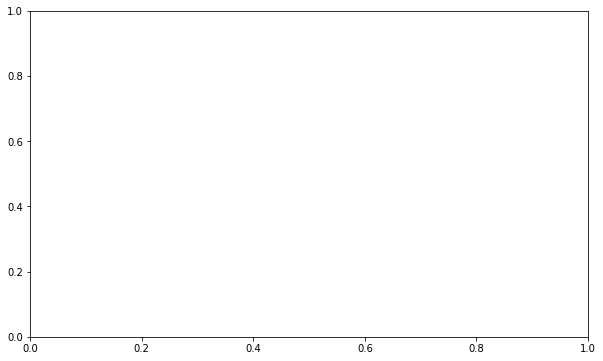

In [26]:
## NameError: name 'axes' is not defined

fig, ax = plt.subplots(nrows=1,ncols=1, figsize = (10,6))
sns.barplot(x= "Zeitstempel", y = "Wert", data = airPressure, ax = axes[0], palette ="OrRd")
plt.show()

In [ ]:
#sns.pairplot(airPressure, palette = "magma", height =2, hue="Wert")
#plt.show()

In [40]:
##joonsoh
#testing mean values for weather data.sets
precipitationAmount.groupby("SDO_ID").mean()

In [39]:
precipitationAmount.head()

In [38]:
group_name = precipitationAmount.groupby(["day","SDO_ID","Wert"])
group_name.size()

In [37]:
group_name.size().unstack()

In [36]:
##Joonsoh
#day value in pivot table
#pd.pivot_table(precipitationAmount, "Wert","SDO_ID","day")
#pd.pivot_table(airPressure, "Wert","SDO_ID","day")
#pd.pivot_table(airTemperature, "Wert","SDO_ID","day")
#pd.pivot_table(cloudCoverage, "Wert","SDO_ID","day")
#pd.pivot_table(relativeHumidity, "Wert","SDO_ID","day")
#pd.pivot_table(soilTemperature, "Wert","SDO_ID","day")
#pd.pivot_table(sunshineDuration, "Wert","SDO_ID","day")
#pd.pivot_table(windVelocity, "Wert","SDO_ID","day")

In [42]:
precipitaionAmount_index= precipitationAmount.set_index(["SDO_ID","day","time"]).sort_index()
#precipitationAmount_index=precipitationAmount.set_index(["SDO_ID","day","Wert"])
precipitaionAmount_index

In [44]:
def n_plot(SDO_ID,day):
    data= precipitationAmount.loc[SDO_ID,day]
    plt.plot(data.index, data.values)
    plt.figure(figsize=(18,8))
n_plot("1301","2019-01-01")
## there is an error in plotting 